In [1]:
from line_builder import *

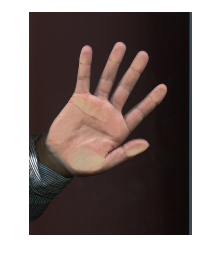

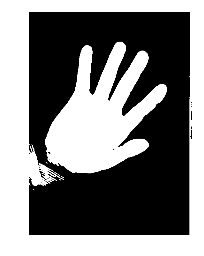

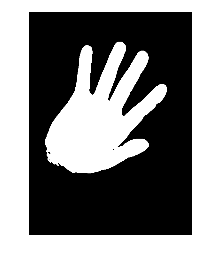

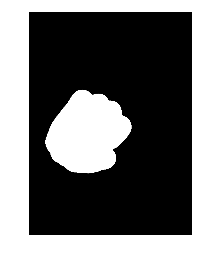

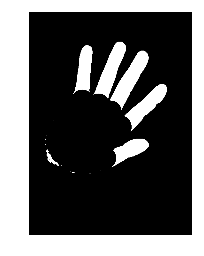

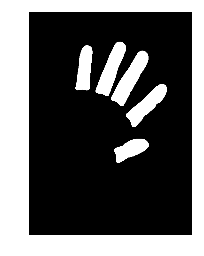

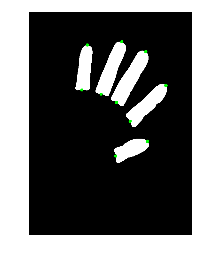

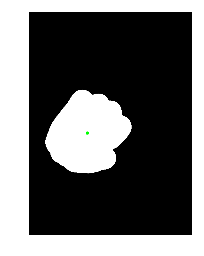

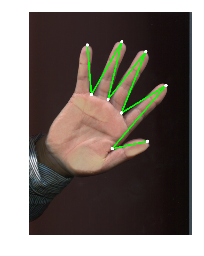

In [2]:
%matplotlib inline
# поэтапный вывод промежуточных изображений
image = "./training/111.tif"
pct = segment_line_bilder(image, True)

In [3]:
a = !ls ./training
X_kNN = np.empty((len(a), 8), dtype='float64')
i = 0
for fn in a:
    #print fn
    pct, feature = segment_line_bilder("./training/" + fn)
    cv2.imwrite("./results_1/" + fn, cv2.cvtColor(pct, cv2.COLOR_RGB2BGR))
    X_kNN[i] = feature
    i = i + 1

In [4]:
from sklearn.neighbors import NearestNeighbors

knn = NearestNeighbors(n_neighbors=4, algorithm='brute', metric='euclidean')

knn.fit(X_kNN)

for i in knn.kneighbors(X_kNN)[1]:
    print a[i[0]], '-',
    for j in i[1:]:
        print a[j],
    print

001.tif - 002.tif 037.tif 097.tif
002.tif - 001.tif 037.tif 039.tif
003.tif - 006.tif 005.tif 007.tif
004.tif - 006.tif 005.tif 007.tif
005.tif - 007.tif 006.tif 003.tif
006.tif - 005.tif 007.tif 003.tif
007.tif - 005.tif 006.tif 003.tif
008.tif - 011.tif 063.tif 067.tif
009.tif - 081.tif 079.tif 011.tif
010.tif - 057.tif 065.tif 009.tif
011.tif - 046.tif 079.tif 056.tif
012.tif - 015.tif 013.tif 014.tif
013.tif - 012.tif 014.tif 015.tif
014.tif - 013.tif 012.tif 015.tif
015.tif - 012.tif 013.tif 014.tif
016.tif - 017.tif 018.tif 021.tif
017.tif - 020.tif 016.tif 053.tif
018.tif - 021.tif 019.tif 016.tif
019.tif - 021.tif 018.tif 016.tif
020.tif - 017.tif 056.tif 016.tif
021.tif - 019.tif 018.tif 016.tif
022.tif - 026.tif 035.tif 028.tif
023.tif - 095.tif 124.tif 022.tif
024.tif - 056.tif 046.tif 021.tif
026.tif - 028.tif 022.tif 029.tif
027.tif - 029.tif 026.tif 036.tif
028.tif - 026.tif 034.tif 022.tif
029.tif - 027.tif 026.tif 028.tif
031.tif - 129.tif 128.tif 111.tif
034.tif - 028.

In [5]:
from sklearn.cluster import Birch

km = Birch(threshold=10, branching_factor=50, n_clusters=None)

pred = km.fit_predict(X_kNN)
for i in range(np.max(pred) + 1):
    print "Персона №" + str(i + 1) + " -",
    for j in range(len(pred)):
        if pred[j] == i:
            print a[j],
    print

Персона №1 - 001.tif 002.tif 037.tif
Персона №2 - 003.tif 004.tif 005.tif 006.tif 007.tif 012.tif 013.tif 014.tif 015.tif 155.tif
Персона №3 - 008.tif 011.tif
Персона №4 - 009.tif 010.tif 057.tif
Персона №5 - 016.tif 017.tif 018.tif 019.tif 020.tif 021.tif 024.tif 046.tif 056.tif
Персона №6 - 022.tif 023.tif 026.tif
Персона №7 - 027.tif 029.tif
Персона №8 - 028.tif 034.tif 120.tif
Персона №9 - 031.tif
Персона №10 - 035.tif 036.tif
Персона №11 - 039.tif
Персона №12 - 041.tif 105.tif
Персона №13 - 047.tif 049.tif 050.tif
Персона №14 - 051.tif 052.tif 053.tif 054.tif 055.tif 068.tif
Персона №15 - 060.tif 144.tif 145.tif
Персона №16 - 063.tif 067.tif 096.tif
Персона №17 - 064.tif
Персона №18 - 065.tif
Персона №19 - 066.tif 128.tif 129.tif
Персона №20 - 071.tif
Персона №21 - 076.tif 077.tif 078.tif 079.tif 082.tif
Персона №22 - 081.tif 090.tif 097.tif
Персона №23 - 086.tif 088.tif 091.tif
Персона №24 - 092.tif 095.tif 124.tif
Персона №25 - 093.tif 109.tif
Персона №26 - 099.tif 157.tif
Персо